## Evaluation 1: Datasource vs. Detection Stage

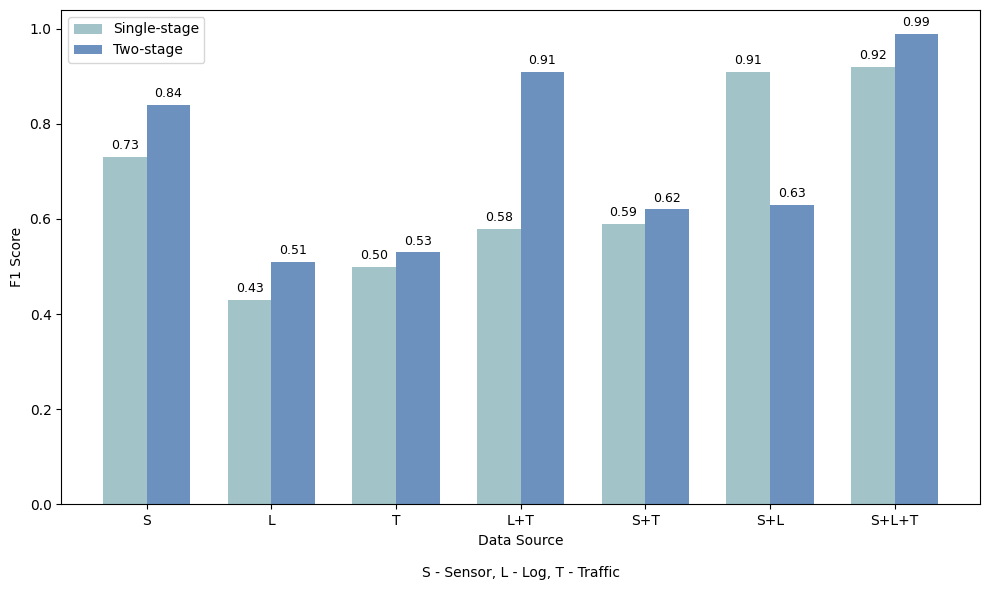

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# F1 scores for each combination (original order)
f1_single_stage = [0.73, 0.43, 0.50, 0.59, 0.91, 0.58, 0.92]
f1_two_stage = [0.84, 0.51, 0.53, 0.62, 0.63, 0.91, 0.99]



# New order: S, L, T, L+T, S+T, S+L, S+L+T
new_order_indices_custom = [0, 1, 2, 5, 3, 4, 6]
f1_single_stage_custom = [f1_single_stage[i] for i in new_order_indices_custom]
f1_two_stage_custom = [f1_two_stage[i] for i in new_order_indices_custom]
custom_labels = ['S', 'L', 'T', 'L+T', 'S+T', 'S+L', 'S+L+T']

# Update positions
x_custom = np.arange(len(custom_labels))
width = 0.35
color_single_stage_light_orange = '#A2C4C9'   # Muted cyan-gray #FFD9B3' #'#FFD9B3' #CFFFE5  # Light orange
color_two_stage_muted_orange = '#6C91BF'     # Muted blue #ff7f0e'  #228B22 #ff7f0e'     # Muted orange

# Create the customized bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x_custom - width/2, f1_single_stage_custom, width, label='Single-stage', color=color_single_stage_light_orange)
bars2 = plt.bar(x_custom + width/2, f1_two_stage_custom, width, label='Two-stage', color=color_two_stage_muted_orange)


# Add values on top of bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# Labels and title
plt.xlabel('Data Source\n\nS - Sensor, L - Log, T - Traffic')
plt.ylabel('F1 Score')
#plt.title('F1', fontsize=16, fontweight='bold')
plt.xticks(x_custom, custom_labels)
plt.legend()

plt.tight_layout()
plt.show()



# Evaluation 2: Effect of Time Windows

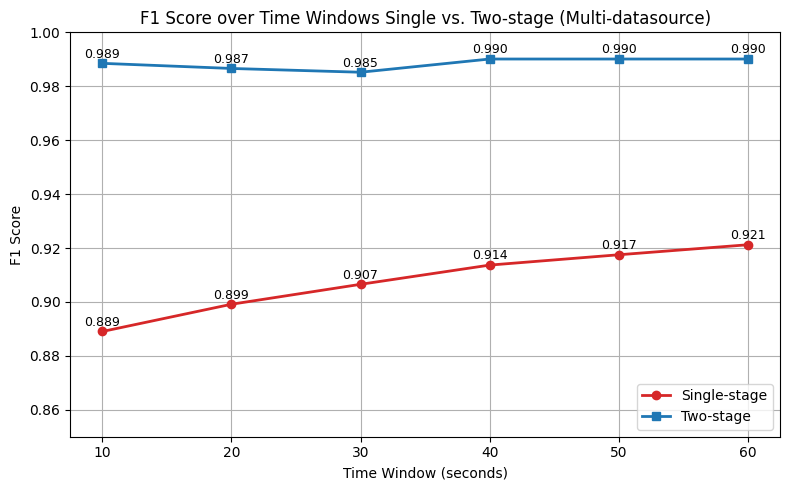

In [ ]:
import matplotlib.pyplot as plt

# Time windows
time_seconds = ["10s", "20s", "30s", "40s", "50s", "60s"]
x_labels = [int(s[:-1]) for s in time_seconds]

# F1 scores
single_stage_scores = [
    0.8890362797964583,
    0.8991402629444476,
    0.9065347208572169,
    0.9136602764771488,
    0.9174924516228039,
    0.9212003915671677
]

two_stage_scores = [
    0.9885,
    0.9866,
    0.9852,
    0.9901,
    0.9901,
    0.9901
]

single_stage_color = "#d62728"
two_stage_color = "#1f77b4"

plt.figure(figsize=(8, 5))
plt.plot(x_labels, single_stage_scores, marker='o', color=single_stage_color, label='Single-stage', linewidth=2)
plt.plot(x_labels, two_stage_scores, marker='s', color=two_stage_color, label='Two-stage', linewidth=2)

for x, y in zip(x_labels, single_stage_scores):
    plt.text(x, y + 0.001, f"{y:.3f}", ha='center', va='bottom', fontsize=9)

for x, y in zip(x_labels, two_stage_scores):
    plt.text(x, y + 0.001, f"{y:.3f}", ha='center', va='bottom', fontsize=9)

plt.title('F1 Score over Time Windows Single vs. Two-stage (Multi-datasource)')
plt.xlabel('Time Window (seconds)')
plt.ylabel('F1 Score')
plt.xticks(x_labels)
plt.ylim(0.85, 1.0)
plt.grid(True)

# Legend at bottom-right
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()



# Evaluation 3: Learning Models for Two-stage & First-stage Detection

## Learning Models for Two-stage Detection

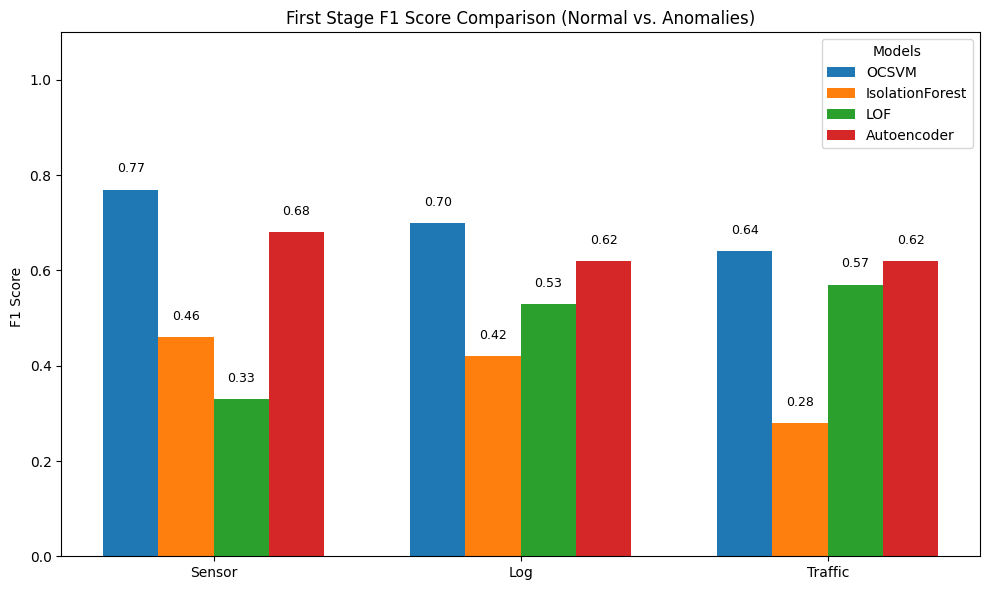

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Rearranging data for new format: group by data source
models = ['OCSVM', 'IsolationForest', 'LOF', 'Autoencoder']
data_sources = ['Sensor', 'Log', 'Traffic']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Extract F1 scores by model within each data source
f1_grouped = [
    [0.77, 0.46, 0.33, 0.68],  # Sensor
    [0.70, 0.42, 0.53, 0.62],  # Log
    [0.64, 0.28, 0.57, 0.62]   # Traffic
]

x = np.arange(len(data_sources))  # positions for Sensor, Log, Traffic
width = 0.18

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model at adjusted positions
for i in range(len(models)):
    model_scores = [f1_grouped[j][i] for j in range(len(data_sources))]
    ax.bar(x + (i - 1.5)*width, model_scores, width, label=models[i], color=colors[i])
    for j, score in enumerate(model_scores):
        ax.text(x[j] + (i - 1.5)*width, score + 0.03, f'{score:.2f}', ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_ylabel('F1 Score ')
ax.set_title('First Stage F1 Score Comparison (Normal vs. Anomalies)')
ax.set_xticks(x)
ax.set_xticklabels(data_sources)
ax.set_ylim(0, 1.1)
ax.legend(title='Models')
#ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


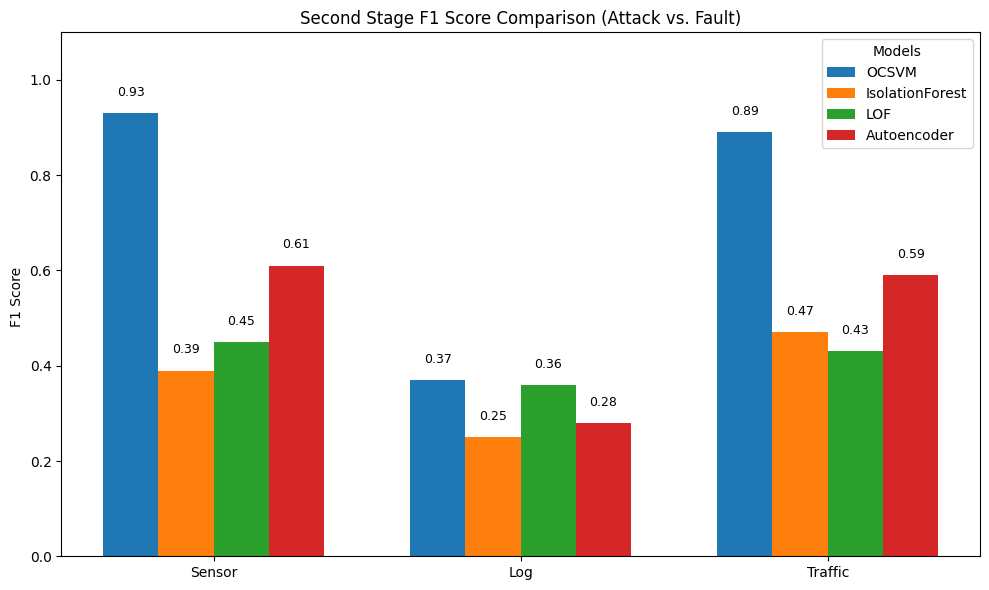

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Rearranging data for new format: group by data source
models = ['OCSVM', 'IsolationForest', 'LOF', 'Autoencoder']
data_sources = ['Sensor', 'Log', 'Traffic']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Extract F1 scores by model within each data source
f1_grouped = [
    [0.93, 0.39, 0.45, 0.61],  # Sensor
    [0.37, 0.25, 0.36, 0.28],  # Log
    [0.89, 0.47, 0.43, 0.59]   # Traffic
]

x = np.arange(len(data_sources))  # positions for Sensor, Log, Traffic
width = 0.18

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model at adjusted positions
for i in range(len(models)):
    model_scores = [f1_grouped[j][i] for j in range(len(data_sources))]
    ax.bar(x + (i - 1.5)*width, model_scores, width, label=models[i], color=colors[i])
    for j, score in enumerate(model_scores):
        ax.text(x[j] + (i - 1.5)*width, score + 0.03, f'{score:.2f}', ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_ylabel('F1 Score ')
ax.set_title('Second Stage F1 Score Comparison (Attack vs. Fault)')
ax.set_xticks(x)
ax.set_xticklabels(data_sources)
ax.set_ylim(0, 1.1)
ax.legend(title='Models')
#ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Learning Models for Single-stage Detection





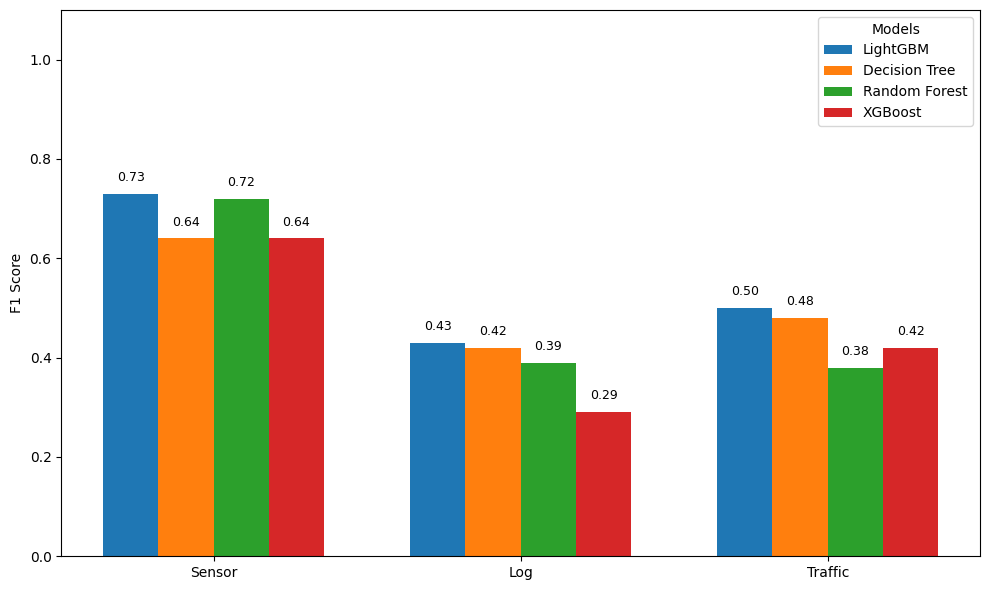

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and data sources
models = ['LightGBM', 'Decision Tree', 'Random Forest', 'XGBoost']
data_sources = ['Sensor', 'Log', 'Traffic']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# F1 scores grouped by data source
f1_grouped = [
    [0.73, 0.64, 0.72, 0.64],  # Sensor
    [0.43, 0.42, 0.39, 0.29],  # Log
    [0.50, 0.48, 0.38, 0.42]   # Traffic
]

x = np.arange(len(data_sources))  # Positions for Sensor, Log, Traffic
width = 0.18  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model at adjusted positions
for i in range(len(models)):
    model_scores = [f1_grouped[j][i] for j in range(len(data_sources))]
    ax.bar(x + (i - 1.5)*width, model_scores, width, label=models[i], color=colors[i])
    for j, score in enumerate(model_scores):
        ax.text(x[j] + (i - 1.5)*width, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_ylabel('F1 Score')
#ax.set_title('Single-stage F1 Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(data_sources)
ax.set_ylim(0, 1.1)
ax.legend(title='Models')

plt.tight_layout()
plt.show()


# Raw Data Visualisation

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


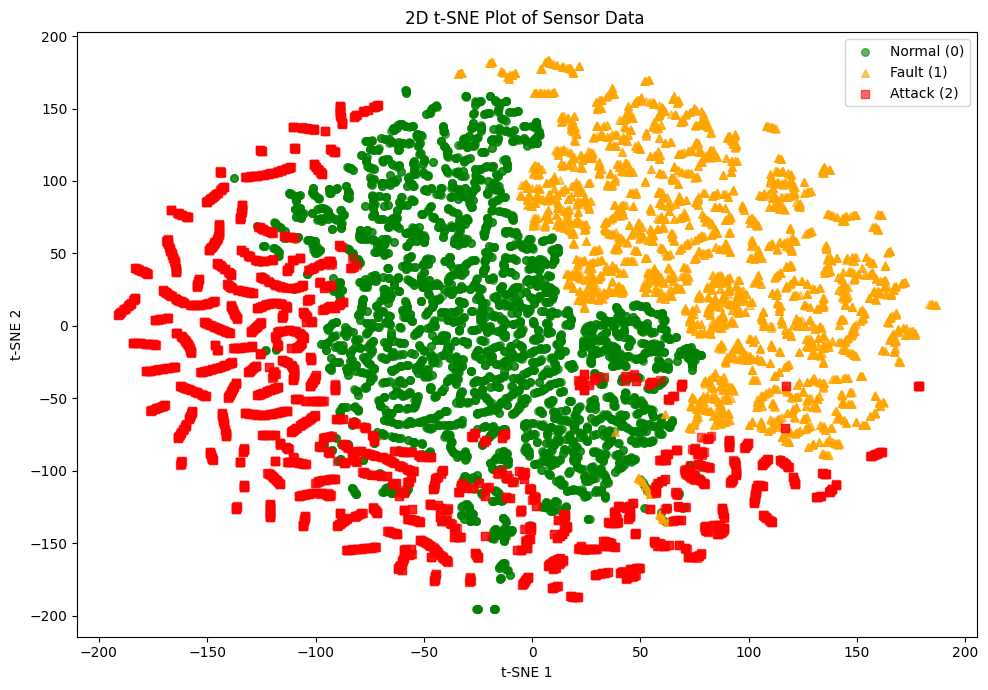

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ===================== Load Data =====================
X = np.load('/content/final_test_oneclass_svm_scaled_data_sensor.npy')        # Features
y = np.load('/content/final_test_labels_sensor.npy').ravel()             # Labels (flattened)

# ===================== Sample 1000 Points per Class =====================
sampled_indices = []
for label in np.unique(y):
    indices = np.where(y == label)[0]
    sampled = np.random.choice(indices, size=min(5000, len(indices)), replace=False)
    sampled_indices.extend(sampled)

X_sampled = X[sampled_indices]
y_sampled = y[sampled_indices]

# ===================== t-SNE Reduction to 2D =====================
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=2000)
X_tsne = tsne.fit_transform(X_sampled)

# ===================== Plotting Config =====================
colors = {0: 'green', 1: 'orange', 2: 'red'}
markers = {0: 'o', 1: '^', 2: 's'}
labels = {0: 'Normal (0)', 1: 'Fault (1)', 2: 'Attack (2)'}

# ===================== 2D Scatter Plot =====================
fig, ax = plt.subplots(figsize=(10, 7))

for label in np.unique(y_sampled):
    ax.scatter(
        X_tsne[y_sampled == label, 0],
        X_tsne[y_sampled == label, 1],
        c=colors[label],
        marker=markers[label],
        label=labels[label],
        s=30,
        alpha=0.6
    )

ax.set_title("2D t-SNE Plot of Sensor Data ")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


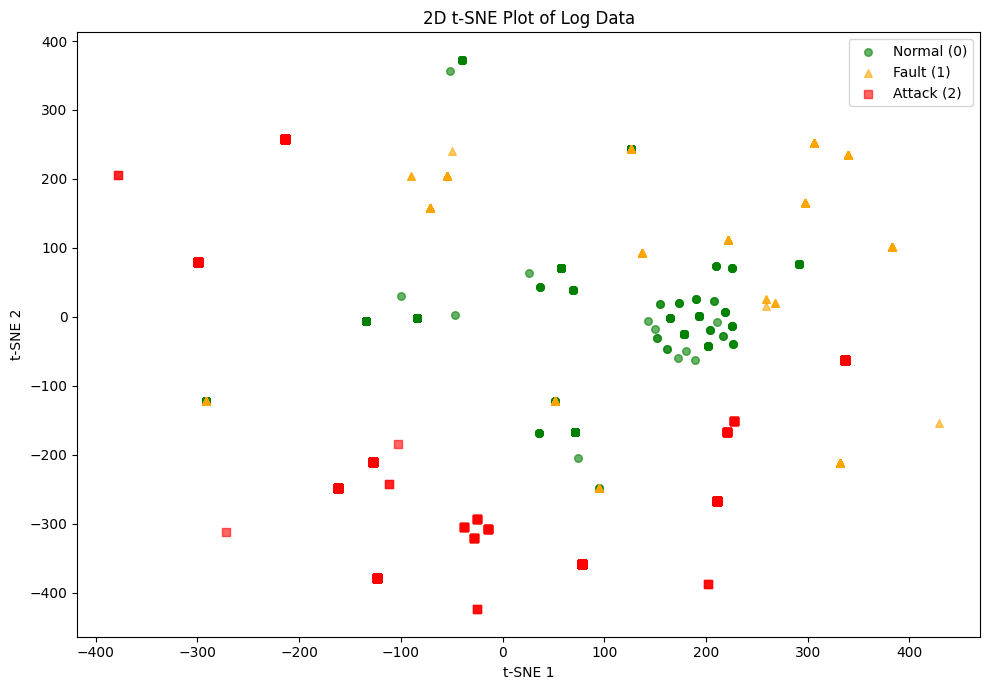

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ===================== Load Data =====================
X = np.load('/content/test_log.npy')
y = np.load('/content/test_labels_log.npy').ravel()

# ===================== Sample 1000 Points per Class =====================
sampled_indices = []
for label in np.unique(y):
    indices = np.where(y == label)[0]
    sampled = np.random.choice(indices, size=min(1000, len(indices)), replace=False)
    sampled_indices.extend(sampled)

X_sampled = X[sampled_indices]
y_sampled = y[sampled_indices]

# ===================== t-SNE Reduction to 2D =====================
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=2000)
X_tsne = tsne.fit_transform(X_sampled)

# ===================== Plotting Config =====================
colors = {0: 'green', 1: 'orange', 2: 'red'}
markers = {0: 'o', 1: '^', 2: 's'}
labels = {0: 'Normal (0)', 1: 'Fault (1)', 2: 'Attack (2)'}

# ===================== 2D Scatter Plot =====================
fig, ax = plt.subplots(figsize=(10, 7))

for label in np.unique(y_sampled):
    ax.scatter(
        X_tsne[y_sampled == label, 0],
        X_tsne[y_sampled == label, 1],
        c=colors[label],
        marker=markers[label],
        label=labels[label],
        s=30,
        alpha=0.6
    )

ax.set_title("2D t-SNE Plot of Log Data")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


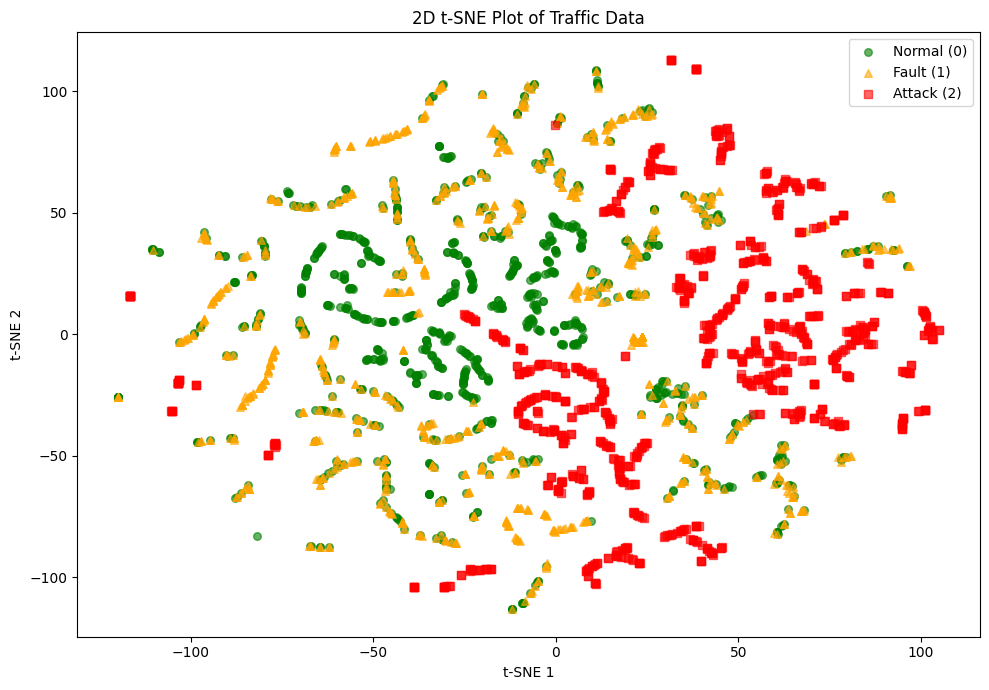

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ===================== Load Data =====================
X = np.load('final_test_oneclass_svm_scaled_traffic.npy')        # Features
y = np.load('final_test_labels_traffic.npy').ravel()             # Labels (flattened)

# ===================== Sample 1000 Points per Class =====================
sampled_indices = []
for label in np.unique(y):
    indices = np.where(y == label)[0]
    sampled = np.random.choice(indices, size=min(1000, len(indices)), replace=False)
    sampled_indices.extend(sampled)

X_sampled = X[sampled_indices]
y_sampled = y[sampled_indices]

# ===================== t-SNE Reduction to 2D =====================
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
X_tsne = tsne.fit_transform(X_sampled)

# ===================== Plotting Config =====================
colors = {0: 'green', 1: 'orange', 2: 'red'}
markers = {0: 'o', 1: '^', 2: 's'}
labels = {0: 'Normal (0)', 1: 'Fault (1)', 2: 'Attack (2)'}

# ===================== 2D Scatter Plot =====================
fig, ax = plt.subplots(figsize=(10, 7))

for label in np.unique(y_sampled):
    ax.scatter(
        X_tsne[y_sampled == label, 0],
        X_tsne[y_sampled == label, 1],
        c=colors[label],
        marker=markers[label],
        label=labels[label],
        s=30,
        alpha=0.6
    )

ax.set_title("2D t-SNE Plot of Traffic Data")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend()
plt.tight_layout()
plt.show()


# Training time (Two-stage Detection)

## Sensor

In [ ]:
# OCSVM
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-02-16 06:47:55,932", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-02-16 06:48:31,808", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-02-16 07:35:54,196", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-02-16 07:35:54,978", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(0.5979333333333333, 0.013033333333333334)

In [ ]:
# LOF
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-04-28 17:43:24,893", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 17:43:27,039", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 17:44:17,879", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 17:44:18,583", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(0.03576666666666666, 0.011733333333333333)

In [ ]:
# Isoforest
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-04-28 14:15:14,315", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 14:15:14,874", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 14:15:20,295", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 14:15:20,643", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(0.009316666666666668, 0.0058)

In [ ]:
# Autoencoder
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-04-28 17:05:46,935", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 17:07:40,355", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 17:14:24,117", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 17:15:14,835", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(1.8903333333333334, 0.8453)

## Log

In [ ]:
# OCSVM
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-02-17 20:40:57,690", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-02-17 20:59:35,417", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-02-18 15:28:26,731", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-02-18 15:36:04,536", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(18.628783333333335, 7.630083333333333)

In [ ]:
# Autoencoder
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-04-28 16:25:50,212", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 16:37:20,058", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 22:45:15,869", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 22:48:18,299", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(11.497433333333333, 3.0405)

In [ ]:
# LOF
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-04-28 18:07:51,227", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 18:09:27,891", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 18:30:19,185", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 18:30:33,038", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(1.6110666666666666, 0.23088333333333333)

In [ ]:
# Isoforest
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-04-28 14:27:21,906", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 14:27:23,519", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 14:27:40,616", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 14:27:42,384", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(0.026883333333333332, 0.029466666666666665)

## Traffic

In [ ]:
# OCSVM
from datetime import datetime

# Extract timestamps for Stage 1 and Stage 2
start_stage_1 = datetime.strptime("2025-02-25 16:56:36,734", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1 = datetime.strptime("2025-02-25 17:01:44,771", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2 = datetime.strptime("2025-02-25 18:15:42,817", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2 = datetime.strptime("2025-02-25 18:16:48,038", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_duration = (end_stage_1 - start_stage_1).total_seconds() / 60
stage_2_duration = (end_stage_2 - start_stage_2).total_seconds() / 60

stage_1_duration, stage_2_duration


(5.13395, 1.0870166666666667)

In [ ]:
# IsolationForest
from datetime import datetime

# Extract timestamps for Stage 1 and Stage 2
start_stage_1 = datetime.strptime("2025-04-28 14:08:30,767", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1 = datetime.strptime("2025-04-28 14:08:31,905", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2 = datetime.strptime("2025-04-28 14:08:44,238", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2 = datetime.strptime("2025-04-28 14:08:44,897", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_duration = (end_stage_1 - start_stage_1).total_seconds() / 60
stage_2_duration = (end_stage_2 - start_stage_2).total_seconds() / 60

stage_1_duration, stage_2_duration


(0.018966666666666666, 0.010983333333333335)

In [ ]:
# LOF
# Extract timestamps for Stage 1 and Stage 2
start_stage_1_new = datetime.strptime("2025-04-28 17:44:26,311", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 17:44:31,250", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 17:45:47,559", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 17:45:49,683", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(0.08231666666666666, 0.0354)

In [ ]:
# Autoencoder
start_stage_1_new = datetime.strptime("2025-04-28 16:21:07,382", "%Y-%m-%d %H:%M:%S,%f")
end_stage_1_new = datetime.strptime("2025-04-28 16:23:54,422", "%Y-%m-%d %H:%M:%S,%f")

start_stage_2_new = datetime.strptime("2025-04-28 17:18:32,832", "%Y-%m-%d %H:%M:%S,%f")
end_stage_2_new = datetime.strptime("2025-04-28 17:21:06,606", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration for each stage
stage_1_new_duration = (end_stage_1_new - start_stage_1_new).total_seconds() / 60
stage_2_new_duration = (end_stage_2_new - start_stage_2_new).total_seconds() / 60

stage_1_new_duration, stage_2_new_duration


(2.784, 2.5629)

# Training Time (Single-stage Detection)

## Sensor

In [ ]:
# LightGBM
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-03-01 13:27:16,482", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-03-01 13:27:17,085", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration


0.01005

In [ ]:
# Decision Tree
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-20 09:12:21,373", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-20 09:12:21,416", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration


0.0007166666666666666

In [ ]:
# Random Forest
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-20 09:16:42,733", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-20 09:16:45,981", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration


0.05413333333333334

In [ ]:
# XGBoost
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-20 09:14:45,259", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-20 09:15:01,082", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration


0.26371666666666665

## Log

In [ ]:
# LightGBM
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-03-01 13:12:51,369", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-03-01 13:18:25,044", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration


5.56125

In [ ]:
# Decision Tree
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-19 17:37:48,382", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-19 17:37:51,466", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration


0.0514

In [ ]:
# Random Forest
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-19 18:23:33,263", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-19 18:35:41,464", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration


12.136683333333334

In [ ]:
# XGBoost
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-19 19:17:23,480", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-19 19:17:53,034", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration

0.49256666666666665

## Traffic

In [ ]:
# LightGBM
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-03-01 19:37:38,674", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-03-01 19:37:40,470", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration

0.029933333333333333

In [ ]:
# Decision Tree
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-20 09:38:05,554", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-20 09:38:05,882", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration

0.0054666666666666665

In [ ]:
# Random Forest
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-20 09:40:35,609", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-20 09:40:38,535", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration

0.048766666666666666

In [ ]:
# XGBoost
from datetime import datetime
# Extract timestamps
start_single_stage_new = datetime.strptime("2025-06-20 09:44:37,580", "%Y-%m-%d %H:%M:%S,%f")
end_single_stage_new = datetime.strptime("2025-06-20 09:44:55,939", "%Y-%m-%d %H:%M:%S,%f")

# Calculate the duration
single_stage_new_duration = (end_single_stage_new - start_single_stage_new).total_seconds() / 60

single_stage_new_duration

0.3059833333333334

# Background Data Visualization

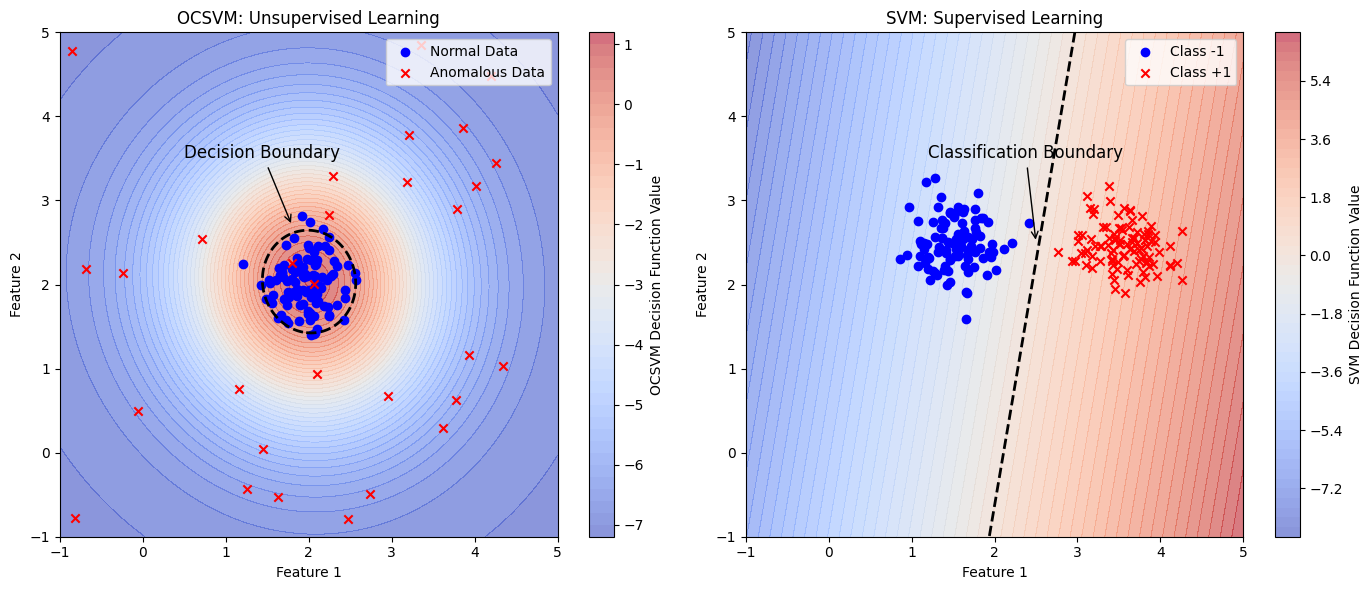

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM, SVC
from sklearn.datasets import make_blobs

# ========== Generate data for OCSVM ==========
rng = np.random.RandomState(42)
X_normal = 2 + 0.3 * rng.randn(100, 2)
X_anomalous = rng.uniform(low=-1, high=5, size=(30, 2))
X_train = X_normal

# Fit One-Class SVM
ocsvm = OneClassSVM(kernel="rbf", gamma=0.5, nu=0.1)
ocsvm.fit(X_train)

# Meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(-1, 5, 500), np.linspace(-1, 5, 500))
Z_ocsvm = ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# ========== Generate data for Linear SVM ==========
X_svm_linear = np.vstack([
    np.random.randn(100, 2) * 0.3 + [1.5, 2.5],  # Class -1
    np.random.randn(100, 2) * 0.3 + [3.5, 2.5]   # Class +1
])
y_svm_linear = np.array([-1]*100 + [1]*100)

# Fit linear SVM
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_svm_linear, y_svm_linear)
Z_svm_linear = svm_linear.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# ========== Plotting ==========
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: OCSVM Plot
ax = axes[0]
cs1 = ax.contourf(xx, yy, Z_ocsvm, levels=50, cmap='coolwarm', alpha=0.6)
ax.scatter(X_normal[:, 0], X_normal[:, 1], c='blue', marker='o', label='Normal Data')
ax.scatter(X_anomalous[:, 0], X_anomalous[:, 1], c='red', marker='x', label='Anomalous Data')
ax.contour(xx, yy, Z_ocsvm, levels=[0], colors='black', linewidths=2, linestyles='--')
ax.annotate('Decision Boundary', xy=(1.8, 2.7), xytext=(0.5, 3.5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
ax.set_title("OCSVM: Unsupervised Learning")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
ax.legend(loc='upper right')
fig.colorbar(cs1, ax=ax).set_label("OCSVM Decision Function Value")

# Right: Linear SVM Plot
ax = axes[1]
cs2 = ax.contourf(xx, yy, Z_svm_linear, levels=50, cmap='coolwarm', alpha=0.6)
ax.scatter(X_svm_linear[y_svm_linear == -1][:, 0], X_svm_linear[y_svm_linear == -1][:, 1],
           c='blue', marker='o', label='Class -1')
ax.scatter(X_svm_linear[y_svm_linear == 1][:, 0], X_svm_linear[y_svm_linear == 1][:, 1],
           c='red', marker='x', label='Class +1')
ax.contour(xx, yy, Z_svm_linear, levels=[0], colors='black', linewidths=2, linestyles='--')
ax.annotate('Classification Boundary', xy=(2.5, 2.5), xytext=(1.2, 3.5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
ax.set_title("SVM: Supervised Learning")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
ax.legend(loc='upper right')
fig.colorbar(cs2, ax=ax).set_label("SVM Decision Function Value")

plt.tight_layout()
plt.show()
